In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ml-100k/u.data',sep = '\t',names = ['user_id','item_id','rating','ts'])  #we are giving the headings as names

In [4]:
df.head()

,user_id,item_id,rating,ts
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
 3   ts       100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [6]:
cols = "item_id|title|release date|video release date|\
            IMDb URL|unknown|Action|Adventure|Animation|\
            Children's|Comedy|Crime|Documentary|Drama|Fantasy|\
            Film-Noir|Horror|Musical|Mystery|Romance|Sci-Fi|\
            Thriller|War|Western".split('|')
movies = pd.read_csv('ml-100k/u.item',sep ='|',names = cols,engine = 'python')
movies.head()

,item_id,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
##see i am keeping instead of movie id item id and movie title as title


In [8]:
movies[['item_id','title']].head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df.head(3)

,user_id,item_id,rating,ts
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [10]:
#now see the upper one here i want to merge on item id and i dont want ts 

In [11]:
data = pd.merge(df.drop('ts',axis = 1),movies[['item_id','title']],on = 'item_id')
data.head()

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  100000 non-null  int64 
 1   item_id  100000 non-null  int64 
 2   rating   100000 non-null  int64 
 3   title    100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.8+ MB


In [13]:
movies.columns 


Index(['item_id', 'title', 'release date', 'video release date',
       '            IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
       '            Children's', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', '            Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', '            Thriller', 'War', 'Western'],
      dtype='object')

In [14]:
#pehle df me 242 hai na to usne pehle 242 wale ko kardiya hai 
data.describe()

,user_id,item_id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


In [15]:
data['title'].nunique()

1664

In [16]:
movies['title'].nunique()

1664

In [17]:
data['user_id'].nunique()

943

In [18]:
data.groupby('item_id')['rating'].mean()

item_id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64

In [19]:
d = data['title'].unique()
for na in d:
    print(na,data['rating'][data['title'] == na].mean())

Kolya (1996) 3.9914529914529915
L.A. Confidential (1997) 4.161616161616162
Heavyweights (1994) 2.1538461538461537
Legends of the Fall (1994) 3.45679012345679
Jackie Brown (1997) 3.642857142857143
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963) 4.252577319587629
Hunt for Red October, The (1990) 3.8634361233480177
Jungle Book, The (1994) 3.5647058823529414
Grease (1978) 3.347058823529412
Remains of the Day, The (1993) 3.94
Men in Black (1997) 3.745874587458746
Romy and Michele's High School Reunion (1997) 3.061224489795918
Star Trek: First Contact (1996) 3.66027397260274
To Wong Foo, Thanks for Everything! Julie Newmar (1995) 2.8947368421052633
Batman Forever (1995) 2.6666666666666665
Only You (1994) 3.1538461538461537
Age of Innocence, The (1993) 3.3846153846153846
Sabrina (1995) 3.5
Just Cause (1995) 3.142857142857143
Endless Summer 2, The (1994) 2.5
Man Without a Face, The (1993) 3.5441176470588234
Sabrina (1954) 3.796875
Die Hard (1988) 3.8724279835390947


In [20]:
avg_rates = data.groupby('title')['rating'].mean()
avg_rates.head(10)

title
'Til There Was You (1997)                      2.333333
1-900 (1994)                                   2.600000
101 Dalmatians (1996)                          2.908257
12 Angry Men (1957)                            4.344000
187 (1997)                                     3.024390
2 Days in the Valley (1996)                    3.225806
20,000 Leagues Under the Sea (1954)            3.500000
2001: A Space Odyssey (1968)                   3.969112
3 Ninjas: High Noon At Mega Mountain (1998)    1.000000
39 Steps, The (1935)                           4.050847
Name: rating, dtype: float64

In [21]:
avg_rates.sort_values(ascending=False).head(20)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [22]:
#par in movies ko kitne logo ne dekha ye bhi matter karta hai na lets find how many people rate kiya 


In [23]:
rate_count = data.groupby('title')['rating'].count()
rate_count.head(20)

title
'Til There Was You (1997)                        9
1-900 (1994)                                     5
101 Dalmatians (1996)                          109
12 Angry Men (1957)                            125
187 (1997)                                      41
2 Days in the Valley (1996)                     93
20,000 Leagues Under the Sea (1954)             72
2001: A Space Odyssey (1968)                   259
3 Ninjas: High Noon At Mega Mountain (1998)      5
39 Steps, The (1935)                            59
8 1/2 (1963)                                    38
8 Heads in a Duffel Bag (1997)                   4
8 Seconds (1994)                                 4
A Chef in Love (1996)                            8
Above the Rim (1994)                             5
Absolute Power (1997)                          127
Abyss, The (1989)                              151
Ace Ventura: Pet Detective (1994)              103
Ace Ventura: When Nature Calls (1995)           37
Across the Sea of Time (1

In [24]:
rate_count.sort_values(ascending = False).head(20)

title
Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: rating, dtype: int64

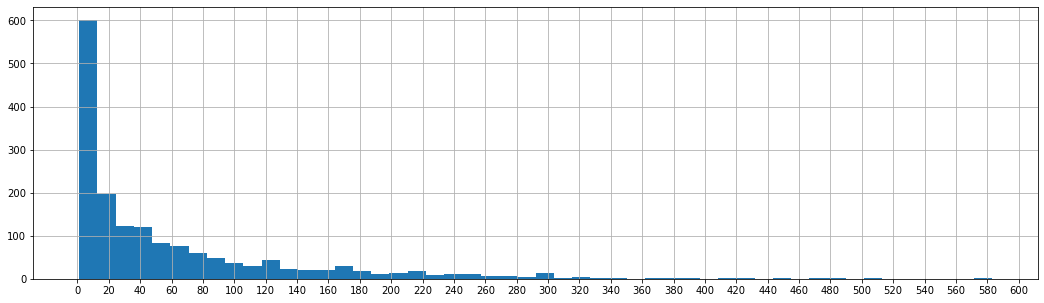

In [25]:
plt.figure(figsize=(18,5))
rate_count.hist(bins=50)
t = plt.xticks(range(0,601,20))

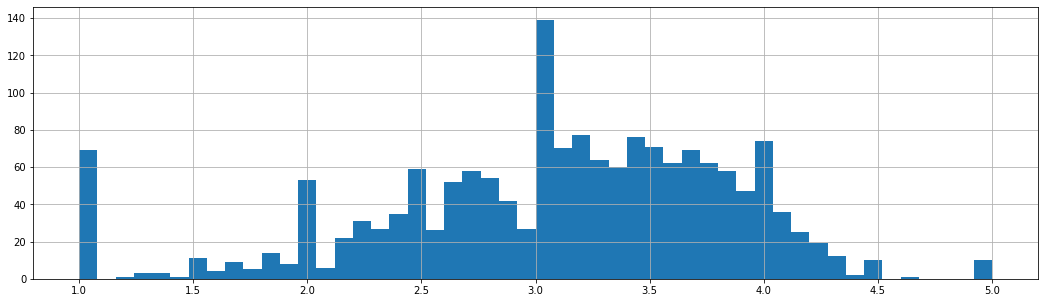

In [26]:
plt.figure(figsize=(18,5))
avg_rates.hist(bins = 50)

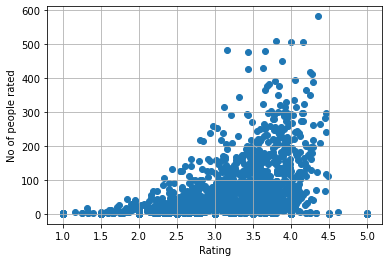

In [27]:
plt.scatter(x = avg_rates,y =rate_count)
plt.xlabel('Rating')
plt.ylabel('No of people rated')
plt.grid()

In [28]:
#Here we can notice one thing that those movies which is rated by less than 100 people have ratings in the range of 1 to 5 but
#does that really matter i mean does that because movies are rated by only people who might have liked the movie , 
#so ultimately we want a movie which is rated by more peoples and the rating is also high 

In [29]:
df_pivot = data.pivot_table(index ='user_id',columns='title',values='rating')
df_pivot.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#so what we are trying to make is a movie recomendation system , ek list banayenge or user ko puvhenge ki konsa movie dekha hai aapne 
#or uske bad jab user wo string that is movie title ko enter karega from the list to phir hum us movie ke based par use recomend karenge movie
#jese ki manlo wo movie star wars hai , to hum kya karenge ki star wars movie ka correlation nikalenge jitni bhi movies hai unke data ke sath 
#or jiska correlation high hoga us movie ko recomend karenge 




In [31]:
inp = 'Star Wars (1977)'

In [32]:
df_pivot[inp].head(10)

user_id
1     5.0
2     5.0
3     NaN
4     5.0
5     4.0
6     4.0
7     5.0
8     5.0
9     5.0
10    5.0
Name: Star Wars (1977), dtype: float64

In [33]:
sim_input = df_pivot.corrwith(df_pivot[inp])

In [34]:
sim_input #star war se ye kitni milti hai 

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [35]:
sim_df = pd.DataFrame(sim_input,columns = ['Correlation'])
sim_df.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [36]:
sim_df.sort_values(by ='Correlation',ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [37]:
#now we want to know ki jo movies ka correlation high hai unn movies ko kitne logo ne rate kiya hai 


In [38]:
sim_df['Count'] = rate_count

In [39]:
sim_df['avg_rat'] = avg_rates

In [40]:
sim_df.head(10)

,Correlation,Count,avg_rat
title,,,
'Til There Was You (1997),0.872872,9,2.333333
1-900 (1994),-0.645497,5,2.600000
101 Dalmatians (1996),0.211132,109,2.908257
12 Angry Men (1957),0.184289,125,4.344000
187 (1997),0.027398,41,3.024390
2 Days in the Valley (1996),0.066654,93,3.225806
"20,000 Leagues Under the Sea (1954)",0.289768,72,3.500000
2001: A Space Odyssey (1968),0.230884,259,3.969112
3 Ninjas: High Noon At Mega Mountain (1998),NaN,5,1.000000


In [41]:
#dekha ab mujhe wohi movies chaiye jinhe 100 se jyada logo ne rate kiya ho

In [42]:
sim_df[(sim_df['Count'])>100].sort_values('Correlation',ascending = False).head(10)

,Correlation,Count,avg_rat
title,,,
Star Wars (1977),1.000000,583,4.358491
"Empire Strikes Back, The (1980)",0.747981,367,4.204360
Return of the Jedi (1983),0.672556,507,4.007890
Raiders of the Lost Ark (1981),0.536117,420,4.252381
Austin Powers: International Man of Mystery (1997),0.377433,130,3.246154
"Sting, The (1973)",0.367538,241,4.058091
Indiana Jones and the Last Crusade (1989),0.350107,331,3.930514
Pinocchio (1940),0.347868,101,3.673267
"Frighteners, The (1996)",0.332729,115,3.234783


In [43]:
recom = sim_df[(sim_df['Count'])>100].sort_values('Correlation',ascending = False)
recom.drop(inp,axis = 0,inplace = True)
recommended = recom.index[:3]
recommended
for i in recommended:
    print(i)


Empire Strikes Back, The (1980)
Return of the Jedi (1983)
Raiders of the Lost Ark (1981)
